In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

dataroot = '../WaterLevelPredction_SelectingModel//Data/'

In [35]:
df = pd.read_pickle(dataroot+'finaldata.pkl')

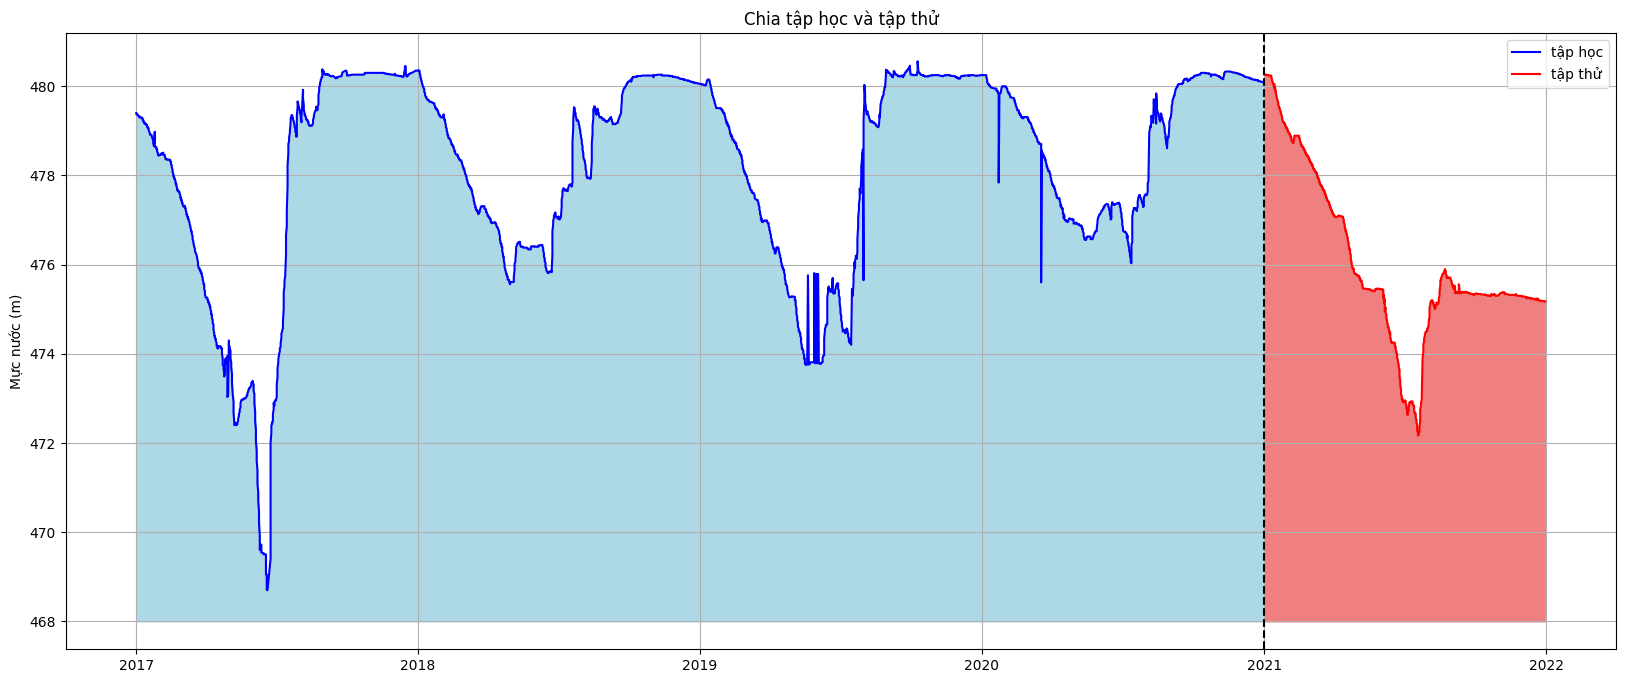

In [36]:
# Train and test split

# train = df.loc[df.index < 2476]
# test = df.loc[df.index >= 2476]

train = df.iloc[:2915]
test = df.iloc[2915:]

plt.figure(figsize=(20, 8))

plt.title('Chia tập học và tập thử')

plt.plot(train['date'], train['water_level'], label='tập học', color='blue')
plt.plot(test['date'], test['water_level'], label='tập thử', color='red')

plt.fill_between(train['date'], 468, train['water_level'], color='lightblue')
plt.fill_between(test['date'], 468, test['water_level'], color='lightcoral')

plt.ylabel('Mực nước (m)')

plt.axvline(train['date'].iloc[-1], color='black', linestyle='--')

plt.grid()
plt.legend()
plt.show()

In [37]:
feature = ['month','hour','precipitation','sluice_status']
target = 'water_level'

In [38]:
X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [39]:
xgb_reg = xgb.XGBRegressor(n_estimators=1000,
                           learning_rate=0.01,
                           early_stopping_rounds=20,
                          )

xgb_reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_test, y_test)],
        verbose=True)

[0]	validation_0-rmse:2.21785	validation_1-rmse:2.88845
[1]	validation_0-rmse:2.20086	validation_1-rmse:2.88446
[2]	validation_0-rmse:2.18407	validation_1-rmse:2.88065
[3]	validation_0-rmse:2.16749	validation_1-rmse:2.87701
[4]	validation_0-rmse:2.15111	validation_1-rmse:2.87355
[5]	validation_0-rmse:2.13494	validation_1-rmse:2.87020
[6]	validation_0-rmse:2.11897	validation_1-rmse:2.86693
[7]	validation_0-rmse:2.10319	validation_1-rmse:2.86377
[8]	validation_0-rmse:2.08761	validation_1-rmse:2.86092
[9]	validation_0-rmse:2.07222	validation_1-rmse:2.85807
[10]	validation_0-rmse:2.05703	validation_1-rmse:2.85540
[11]	validation_0-rmse:2.04203	validation_1-rmse:2.85283
[12]	validation_0-rmse:2.02720	validation_1-rmse:2.85056
[13]	validation_0-rmse:2.01257	validation_1-rmse:2.84827
[14]	validation_0-rmse:1.99812	validation_1-rmse:2.84615
[15]	validation_0-rmse:1.98387	validation_1-rmse:2.84403
[16]	validation_0-rmse:1.96978	validation_1-rmse:2.84218
[17]	validation_0-rmse:1.95588	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
fi = pd.DataFrame(data=xgb_reg.feature_importances_,
              index=xgb_reg.feature_names_in_,
              columns=['importance'])

<Figure size 1000x600 with 0 Axes>

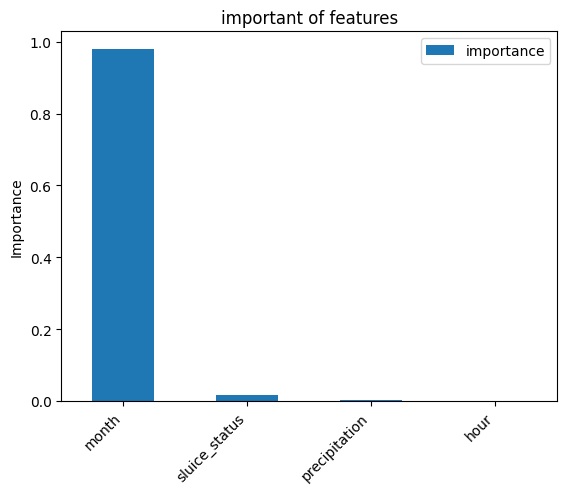

In [41]:
plt.figure(figsize=(10, 6))
fi = fi.sort_values(by='importance', ascending=False)
fi.plot(kind='bar', legend=True)
plt.title('important of features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
test['prediction'] = xgb_reg.predict(X_test)
df.merge(test['prediction'],how='left',left_index=True, right_index=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6312\1739109425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = xgb_reg.predict(X_test)


,year,month,day,water_level,hour,precipitation,sluice_status,date,prediction
0,2017,1,1,479.40,7,0.0,0,2017-01-01,NaN
1,2017,1,1,479.38,19,0.0,0,2017-01-01,NaN
2,2017,1,2,479.37,7,0.0,1,2017-01-02,NaN
3,2017,1,2,479.36,19,0.0,1,2017-01-02,NaN
4,2017,1,3,479.36,7,0.0,1,2017-01-03,NaN
...,...,...,...,...,...,...,...,...,...
3640,2021,12,29,475.18,19,0.0,0,2021-12-29,478.852997
3641,2021,12,30,475.18,7,0.0,0,2021-12-30,478.852997
3642,2021,12,30,475.17,19,0.0,0,2021-12-30,478.852997
3643,2021,12,31,475.17,7,0.0,0,2021-12-31,478.852997


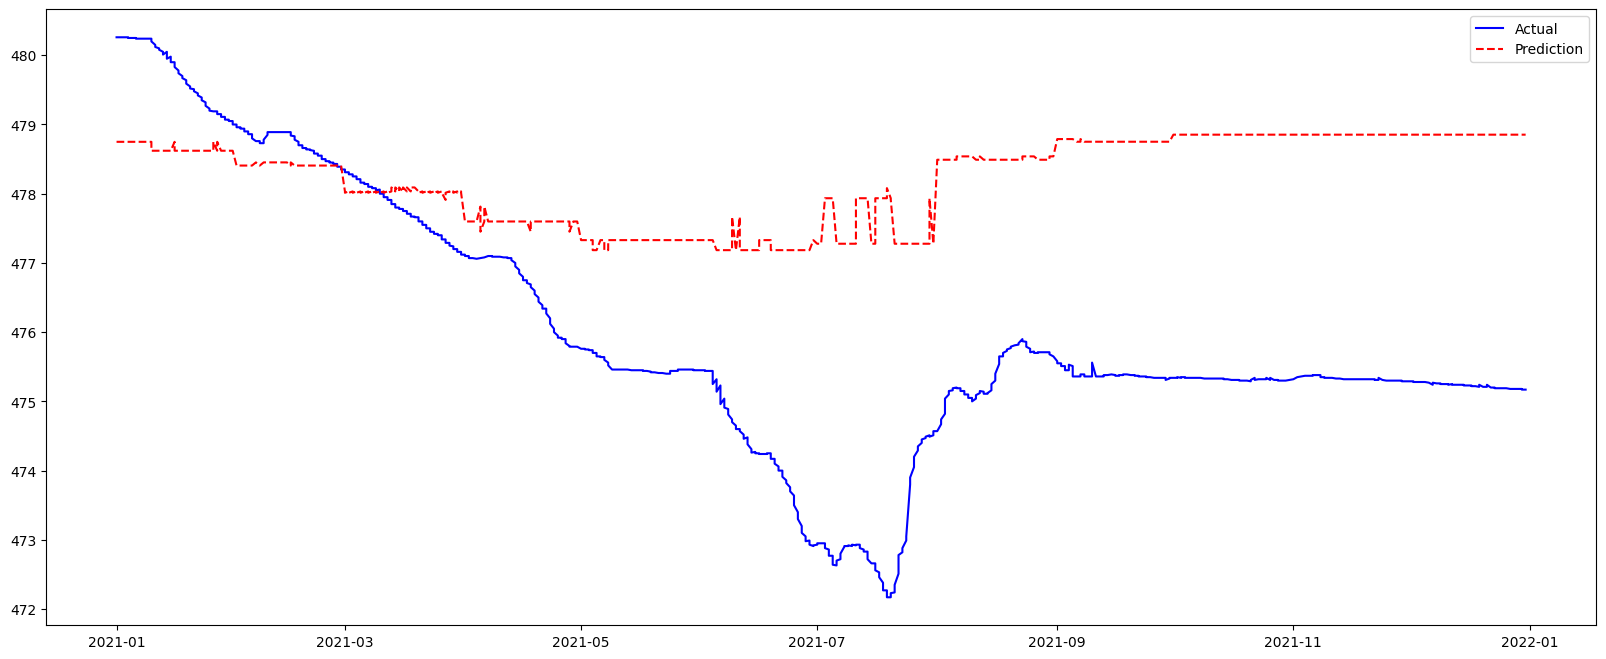

In [43]:
plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['water_level'], label='Actual', color='blue')
plt.plot(test['date'], test['prediction'], label='Prediction', color='red', linestyle='dashed')

plt.legend()
plt.show()

In [44]:
rmse = np.sqrt(mean_squared_error(test['water_level'], test['prediction']))
print("RMSE:", rmse)

r2 = r2_score(test['water_level'], test['prediction'])
print("R2 Score:", r2)

RMSE: 2.8253561420389195
R2 Score: -1.3529213607041943
